In [169]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import numpy as np

sns.set_style('whitegrid')

## Data and Cleaning

In [170]:
data_fp = 'Data/'
graphs_fp = 'Graphs/'

In [171]:
df = pd.read_csv(f'{data_fp}/Data.csv', sep=';')
df

,Time,AccelerometerX,AccelerometerY,AccelerometerZ,GyroscopeX,GyroscopeY,GyroscopeZ,MagnetometerX,MagnetometerY,MagnetometerZ
0,0.019000,0.0060,-0.0683,2.2417,0.000,0.000,-0.1220,-0.0002,0.0074,0.9999
1,0.023000,0.0060,-0.0683,2.2417,0.000,0.000,-0.1220,-0.0002,0.0074,0.9999
2,0.045000,0.0030,-0.1000,3.2135,0.000,0.000,-0.1220,-0.0004,0.0072,0.9999
3,0.053000,-0.0006,-0.1162,3.8278,0.000,0.000,-0.1220,-0.0004,0.0070,0.9999
4,0.057000,-0.0006,-0.1162,3.8278,0.000,0.000,-0.1220,-0.0004,0.0070,0.9999
...,...,...,...,...,...,...,...,...,...,...
34323,429.313995,-0.0054,-0.0892,6.2768,0.061,0.000,-0.2439,0.0136,0.0628,0.9978
34324,429.332001,-0.0054,-0.0784,6.2774,0.061,0.000,-0.2439,0.0132,0.0623,0.9980
34325,429.339996,-0.0012,-0.0545,6.2947,0.122,0.000,-0.2439,0.0125,0.0622,0.9979
34326,429.343994,-0.0012,-0.0545,6.2947,0.122,0.000,-0.2439,0.0125,0.0622,0.9979


In [172]:
for col in df.columns:
    # df[col] = df[col].str.replace(',', '')
    df[col] = df[col].fillna(0)
    df[col] = pd.to_numeric(df[col])

## Histograms

In [173]:
columns = df.columns[1:]
print(columns)

Index(['AccelerometerX', 'AccelerometerY', 'AccelerometerZ', 'GyroscopeX',
       'GyroscopeY', 'GyroscopeZ', 'MagnetometerX', 'MagnetometerY',
       'MagnetometerZ'],
      dtype='object')


In [174]:
for current_column in df.columns[1:]:

    df_plot = df[[current_column]]

    plt.clf()
    plt.figure(figsize=(9, 4.5))

    matplotlib.rc('xtick', labelsize=10)
    matplotlib.rc('ytick', labelsize=10)

    df_plot.hist(bins=200)

    plt.title(f'{current_column}', fontweight='semibold', fontsize=16)
    #plt.xlabel('Poo', fontweight='semibold', fontsize=14)
    #plt.ylabel('Boo', fontweight='semibold', fontsize=14)

    plt.tight_layout()
    plt.savefig(f'{graphs_fp}/{current_column}Histogram.png', dpi=360)
    plt.close('all')

## Time Domain Plots

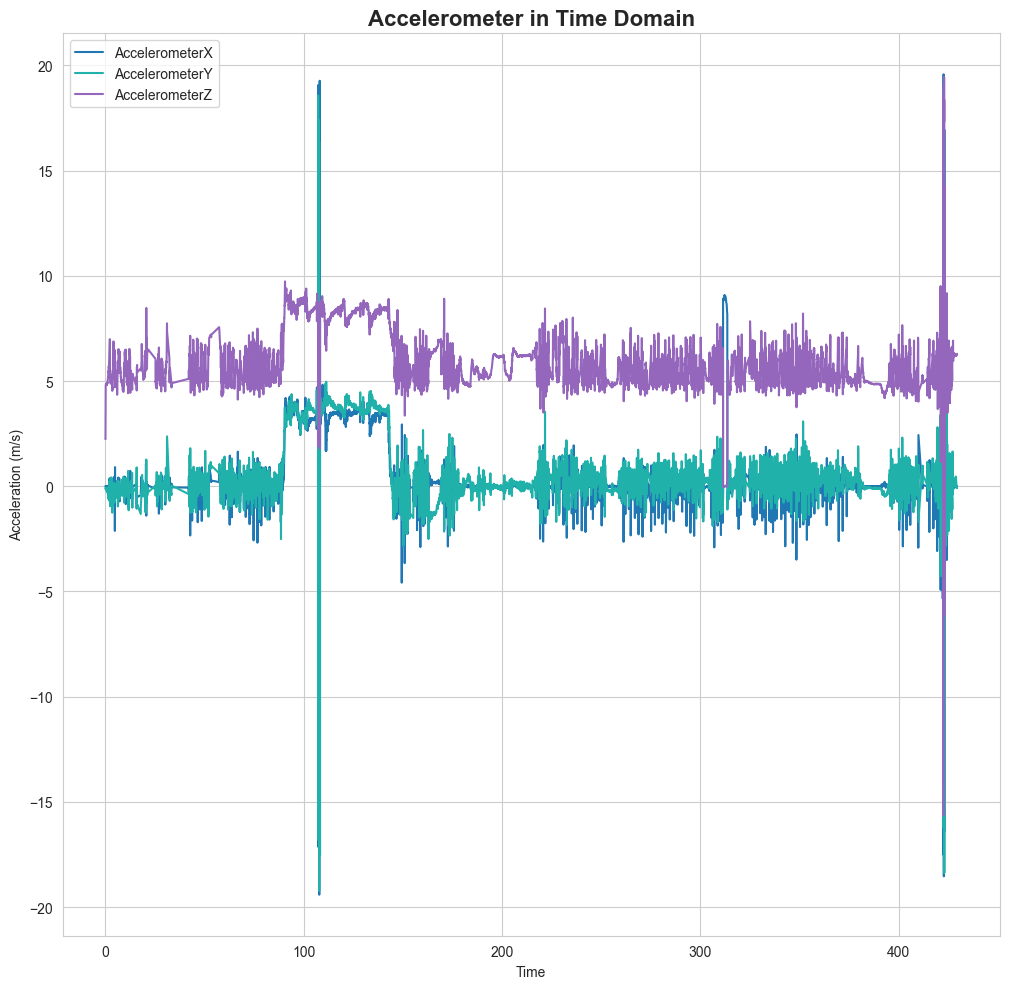

In [175]:
df.plot(x="Time", y=["AccelerometerX", "AccelerometerY", "AccelerometerZ"],
        kind="line", figsize=(10, 10), color={"AccelerometerX": "tab:blue", "AccelerometerY": "lightseagreen","AccelerometerZ": "tab:purple" })

plt.title(f'{"Accelerometer in Time Domain"}', fontweight='semibold', fontsize=16)
# display plot
plt.tight_layout()
plt.ylabel("Acceleration (m/s)")
plt.savefig(f'{graphs_fp}/AccelerometerTime.png', dpi=360)

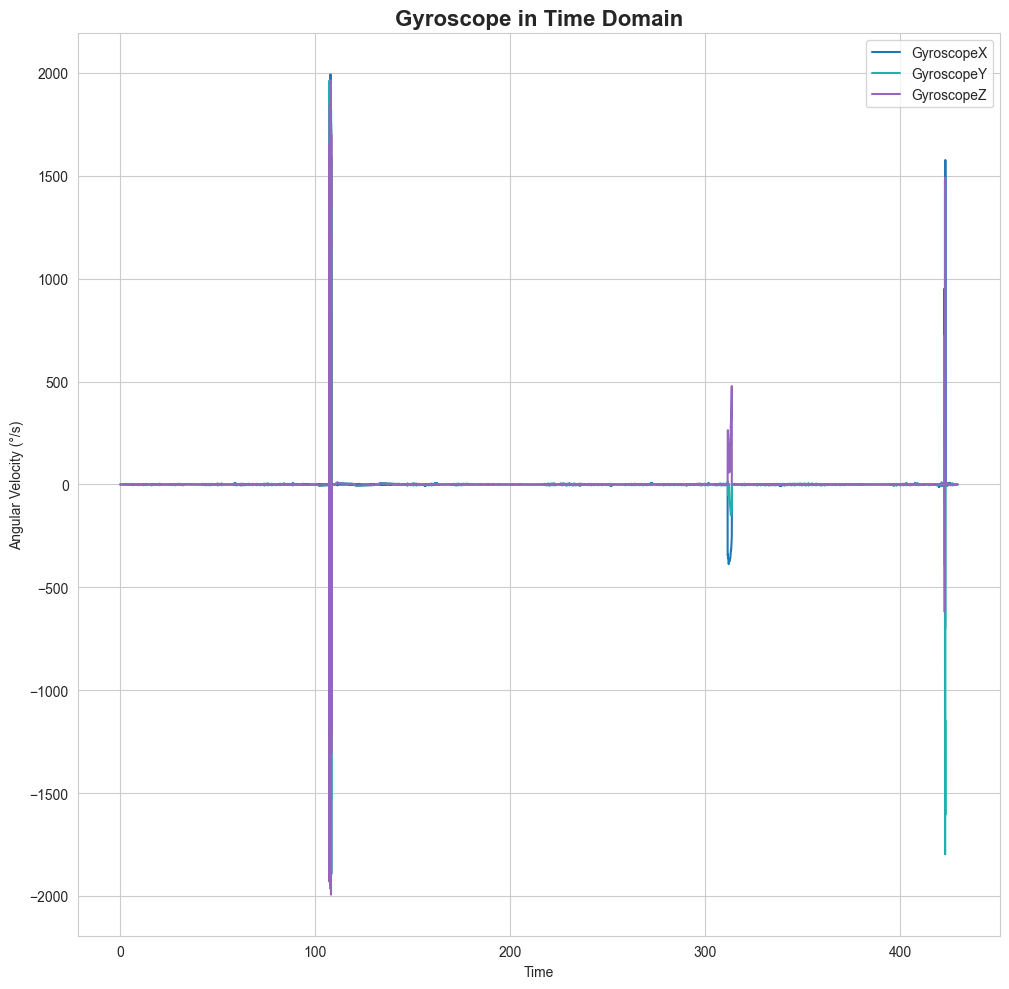

In [176]:
df.plot(x="Time", y=["GyroscopeX", "GyroscopeY", "GyroscopeZ"],
        kind="line", figsize=(10, 10), color={"GyroscopeX": "tab:blue", "GyroscopeY": "lightseagreen","GyroscopeZ": "tab:purple" })

plt.title(f'{"Gyroscope in Time Domain"}', fontweight='semibold', fontsize=16)
# display plot
plt.tight_layout()
plt.ylabel("Angular Velocity (°/s)")
plt.savefig(f'{graphs_fp}/GyroscopeTime.png', dpi=360)

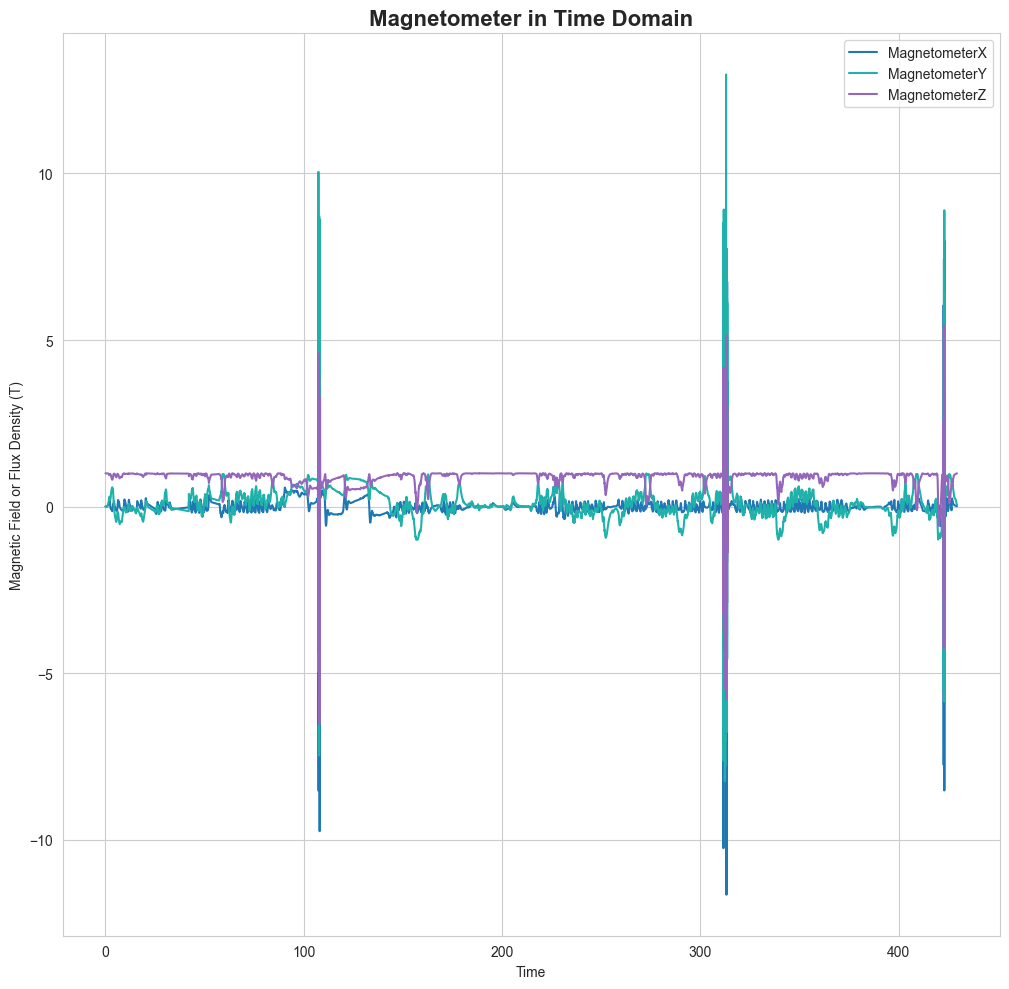

In [177]:
df.plot(x="Time", y=["MagnetometerX", "MagnetometerY", "MagnetometerZ"],
        kind="line", figsize=(10, 10), color={"MagnetometerX": "tab:blue", "MagnetometerY": "lightseagreen","MagnetometerZ": "tab:purple" })

plt.title(f'{"Magnetometer in Time Domain"}', fontweight='semibold', fontsize=16) 
# display plot
plt.tight_layout()
plt.ylabel("Magnetic Field or Flux Density (T)")
plt.savefig(f'{graphs_fp}/MagnetometerTime.png', dpi=360)

## Fourier Transforms

/opt/homebrew/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


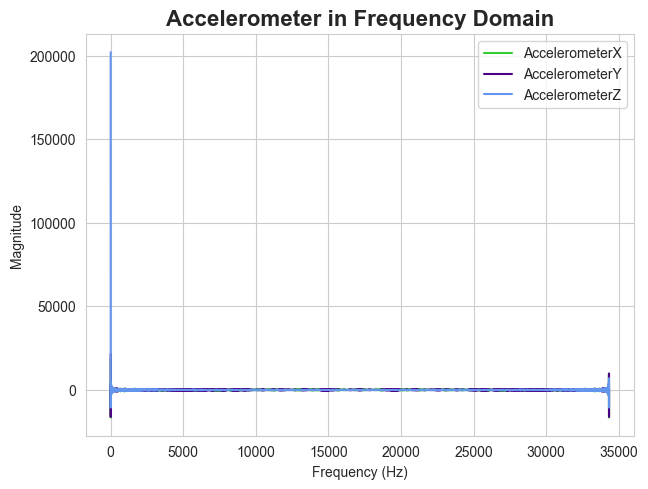

In [178]:
AX = fft(df['AccelerometerX'])
AY = fft(df['AccelerometerY'])
AZ = fft(df['AccelerometerZ'])

plt.plot(AX, color = "limegreen", label = "AccelerometerX")
plt.plot(AY, color = "indigo", label = "AccelerometerY")
plt.plot(AZ, color = "cornflowerblue", label = "AccelerometerZ")

plt.legend(loc="upper right")
plt.title(f'{"Accelerometer in Frequency Domain"}', fontweight='semibold', fontsize=16) 
plt.tight_layout()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.savefig(f'{graphs_fp}/AccelerometerFrequency.png', dpi=360)

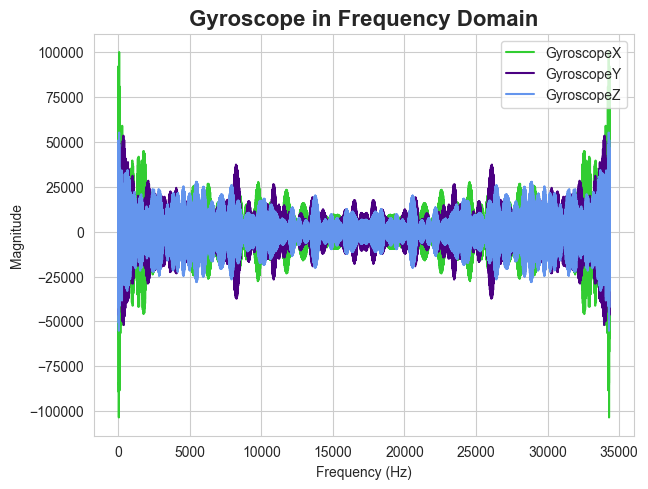

In [179]:
GX = fft(df['GyroscopeX'])
GY = fft(df['GyroscopeY'])
GZ = fft(df['GyroscopeZ'])

plt.plot(GX, color = "limegreen", label = "GyroscopeX")
plt.plot(GY, color = "indigo", label = "GyroscopeY")
plt.plot(GZ, color = "cornflowerblue", label = "GyroscopeZ")

plt.legend(loc="upper right")
plt.title(f'{"Gyroscope in Frequency Domain"}', fontweight='semibold', fontsize=16) 
plt.tight_layout()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.savefig(f'{graphs_fp}/GyroscopeFrequency.png', dpi=360)

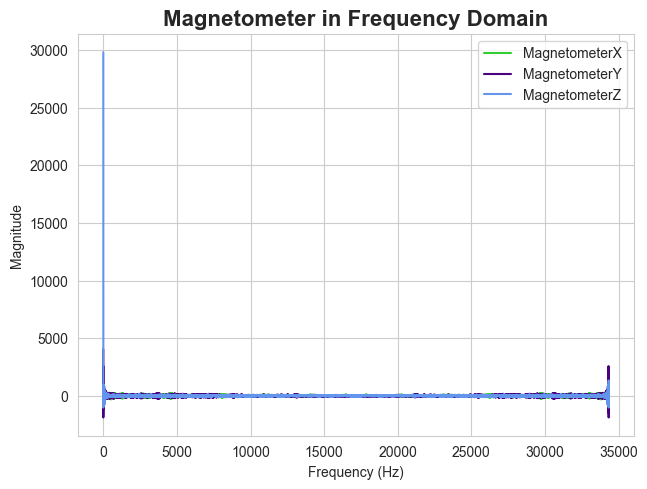

In [180]:
MX = fft(df['MagnetometerX'])
MY = fft(df['MagnetometerY'])
MZ = fft(df['MagnetometerZ'])

plt.plot(MX, color = "limegreen", label = "MagnetometerX")
plt.plot(MY, color = "indigo", label = "MagnetometerY")
plt.plot(MZ, color = "cornflowerblue", label = "MagnetometerZ")
plt.legend(loc="upper right")
plt.title(f'{"Magnetometer in Frequency Domain"}', fontweight='semibold', fontsize=16) 
plt.tight_layout()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.savefig(f'{graphs_fp}/MagnetometerFrequency.png', dpi=360)

## Mean, Median & Standard Deviation

In [181]:
df['AccelerometerX'].describe()

count    34328.000000
mean         0.532169
std          1.614881
min        -19.410999
25%         -0.058700
50%          0.018000
75%          0.375550
max         19.578100
Name: AccelerometerX, dtype: float64

In [182]:
df['AccelerometerY'].describe()

count    34328.000000
mean         0.627148
std          1.580636
min        -19.227800
25%         -0.104800
50%          0.192800
75%          0.722100
max         18.912300
Name: AccelerometerY, dtype: float64

In [183]:
df['AccelerometerZ'].describe()

count    34328.000000
mean         5.886018
std          1.370541
min        -15.658600
25%          4.994200
50%          5.482200
75%          6.377900
max         19.457701
Name: AccelerometerZ, dtype: float64

In [184]:
df['GyroscopeX'].describe()

count    34328.000000
mean        -0.533702
std         79.111290
min      -1893.536621
25%         -0.853700
50%          0.000000
75%          0.914600
max       1993.292847
Name: GyroscopeX, dtype: float64

In [185]:
df['GyroscopeY'].describe()

count    34328.000000
mean        -0.521530
std         76.232833
min      -1964.573242
25%         -0.487800
50%          0.061000
75%          0.731700
max       1963.902344
Name: GyroscopeY, dtype: float64

In [186]:
df['GyroscopeZ'].describe()

count    34328.000000
mean         1.172048
std         73.234824
min      -1993.780640
25%         -0.487800
50%         -0.122000
75%          0.365800
max       1963.841431
Name: GyroscopeZ, dtype: float64

In [187]:
df['MagnetometerX'].describe()

count    34328.000000
mean        -0.006781
std          0.427628
min        -11.645000
25%         -0.113600
50%         -0.016100
75%          0.077500
max          8.230900
Name: MagnetometerX, dtype: float64

In [188]:
df['MagnetometerY'].describe()

count    34328.000000
mean         0.117376
std          0.570070
min         -8.236300
25%         -0.110700
50%          0.071550
75%          0.386900
max         12.968200
Name: MagnetometerY, dtype: float64

In [189]:
df['MagnetometerZ'].describe()

count    34328.000000
mean         0.868291
std          0.317025
min         -6.510400
25%          0.849075
50%          0.957900
75%          0.990800
max          5.440100
Name: MagnetometerZ, dtype: float64